In [28]:
# Hyperparameter tunning results

valid_devices = [
    "ghidorah1",
    "ghidorah2",
    "ghidorah3",
    "QiXin4080Super",
]

# valid_data = ["[757216464]"]
valid_data = [r"[757216464, 715093703]"]


import json
import re

# Read entire file content
with open("hyperparameter_tuning_results.json", "r") as f:
    content = f.read()

# Split between adjacent JSON objects using regex: split at '{' that begins a line (not inside a value)
chunks = re.findall(r'{[^{}]+(?:{[^{}]+}[^{}]*)*}', content)

# Parse each JSON object
json_objects = []
for chunk in chunks:
    try:
        obj = json.loads(chunk)
        json_objects.append(obj)
    except json.JSONDecodeError as e:
        print(f"Failed to parse one object: {e}")
# 
json_objects_filtered = []

for json_obj in json_objects:
    # print(json_obj["model_id"])
    obj = json_obj["model_id"].split("_")
    device = obj[0]
    data = obj[1]
    
    if device in valid_devices and data in valid_data and json_obj['params']['penalty_smoothing_spline']>=1000:
        json_objects_filtered.append(json_obj)

# Sort by test loss
sorted_results = sorted(json_objects_filtered, key=lambda x: x["best_test_loss"])

print(f"Total number of hp settings: {len(json_objects_filtered)}")

# Show top 5
for rank, res in enumerate(sorted_results[:15], 1):
    print(f"\n=== Rank {rank} ===")
    print(f"Model ID: {res['model_id']}")
    print(f"Test Loss: {res['best_test_loss']:.6f}")
    print("Top Params:")
    # for k, v in res["params"].items():
    #     print(f"  {k}: {v}")



Total number of hp settings: 13

=== Rank 1 ===
Model ID: ghidorah1_[757216464, 715093703]_20250507_003340
Test Loss: 0.058816
Top Params:

=== Rank 2 ===
Model ID: ghidorah2_[757216464, 715093703]_20250506_225200
Test Loss: 0.058826
Top Params:

=== Rank 3 ===
Model ID: ghidorah3_[757216464, 715093703]_20250506_020924
Test Loss: 0.058952
Top Params:

=== Rank 4 ===
Model ID: ghidorah3_[757216464, 715093703]_20250506_165947
Test Loss: 0.059373
Top Params:

=== Rank 5 ===
Model ID: ghidorah2_[757216464, 715093703]_20250506_143544
Test Loss: 0.059639
Top Params:

=== Rank 6 ===
Model ID: ghidorah3_[757216464, 715093703]_20250506_160011
Test Loss: 0.059673
Top Params:

=== Rank 7 ===
Model ID: ghidorah2_[757216464, 715093703]_20250506_061539
Test Loss: 0.059791
Top Params:

=== Rank 8 ===
Model ID: ghidorah1_[757216464, 715093703]_20250506_020909
Test Loss: 0.059994
Top Params:

=== Rank 9 ===
Model ID: ghidorah2_[757216464, 715093703]_20250506_020916
Test Loss: 0.060135
Top Params:

=== 

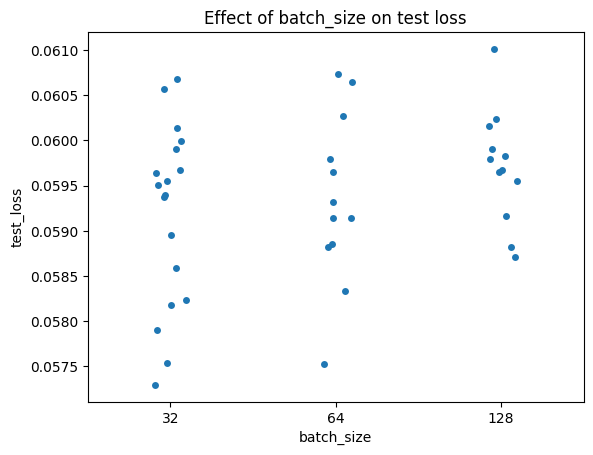

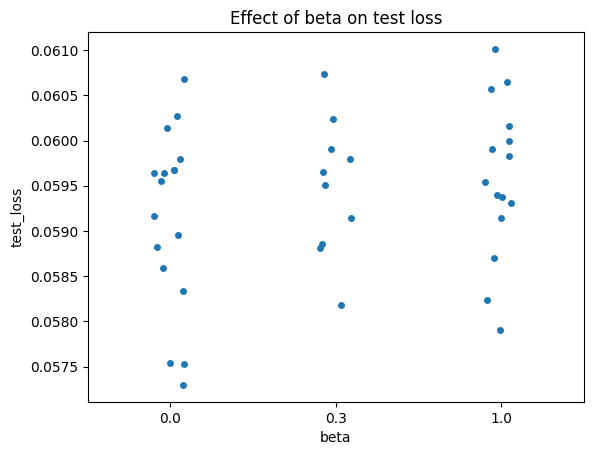

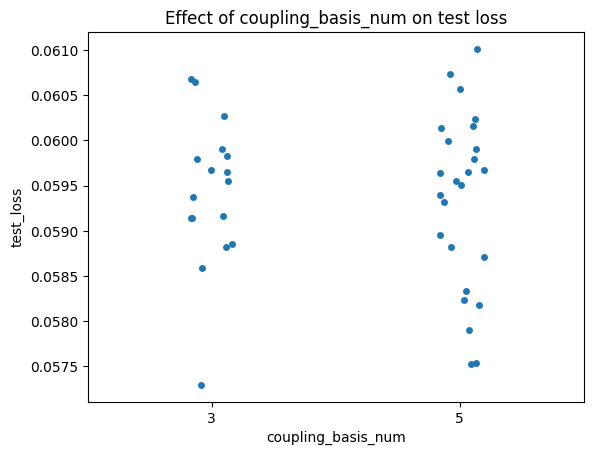

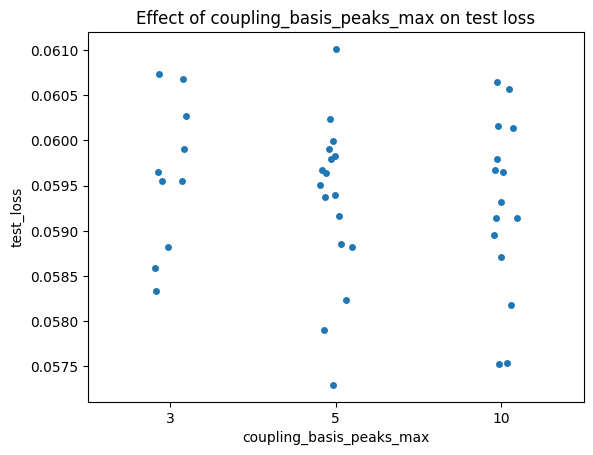

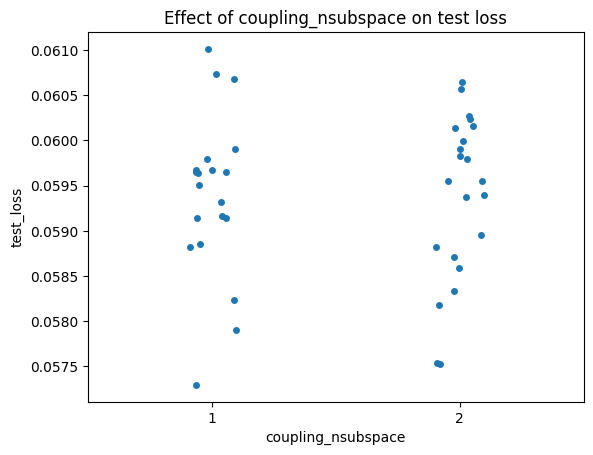

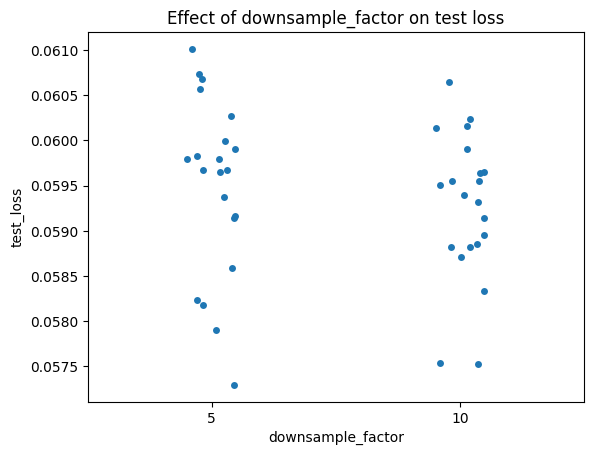

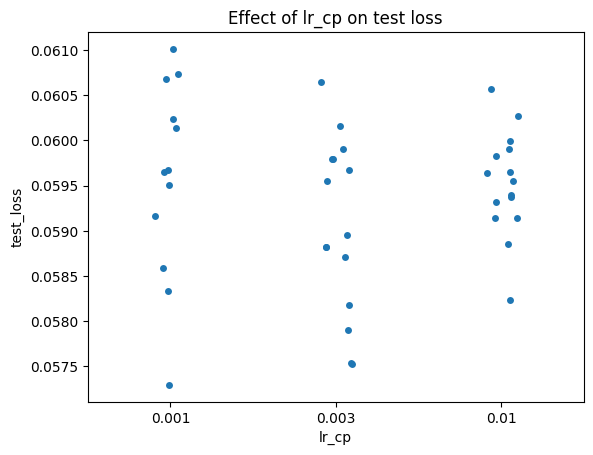

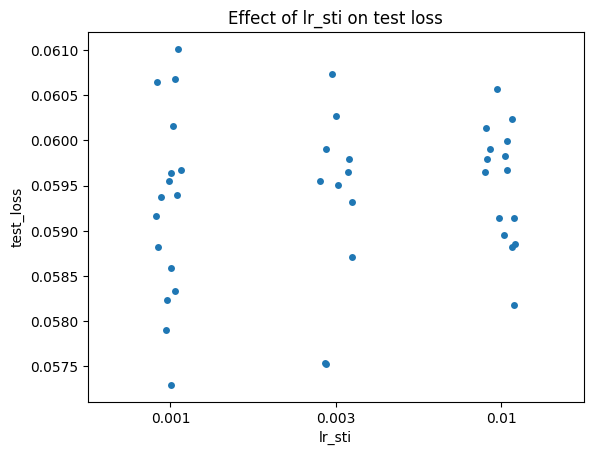

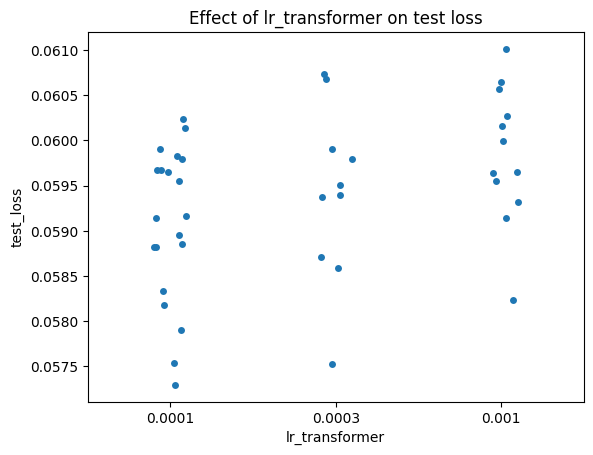

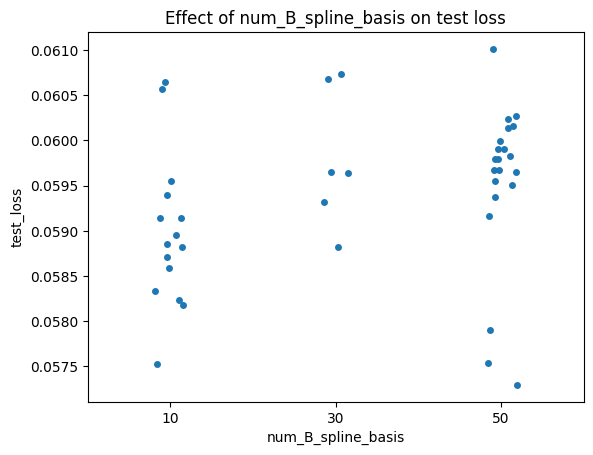

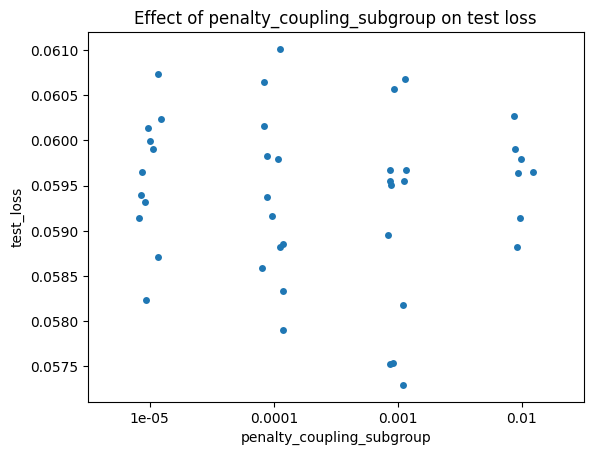

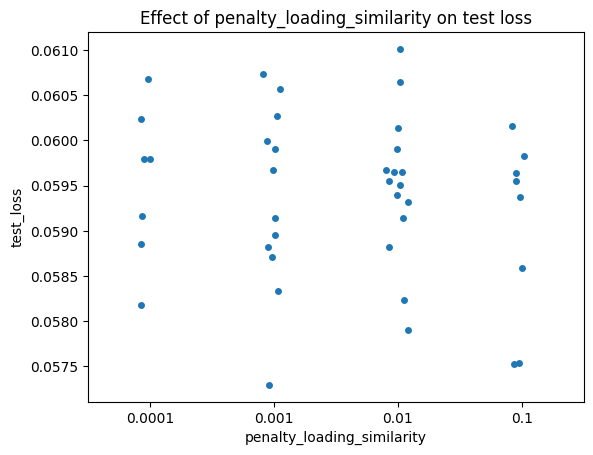

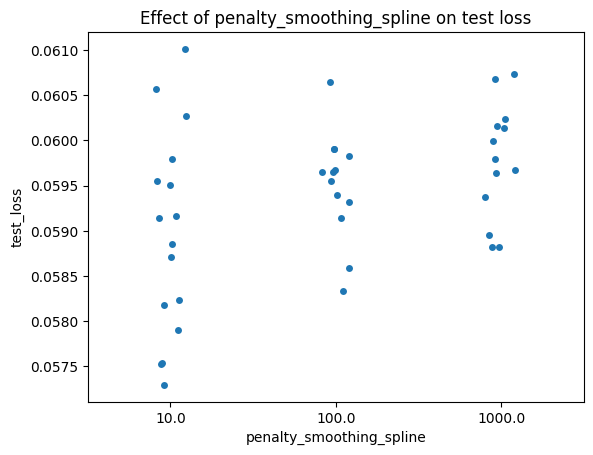

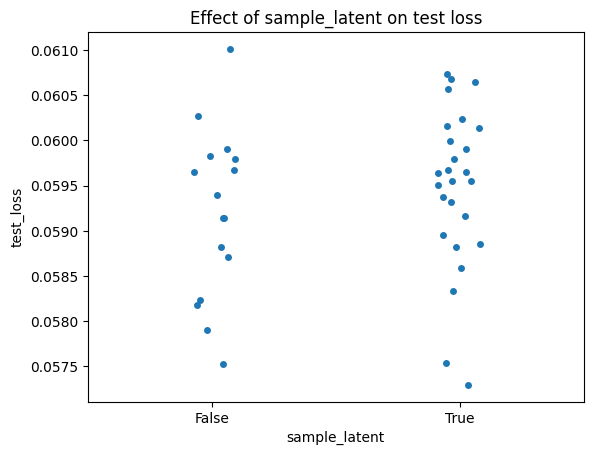

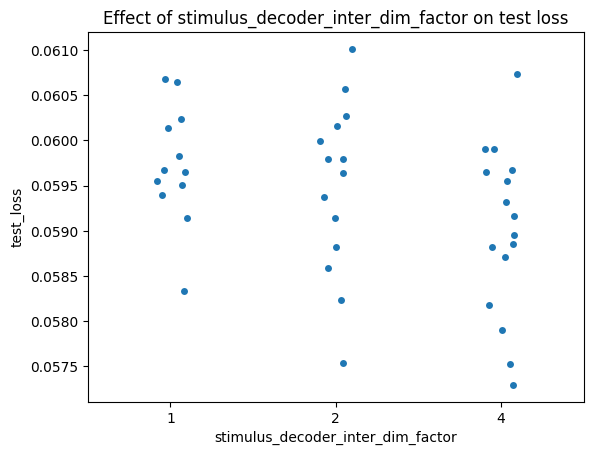

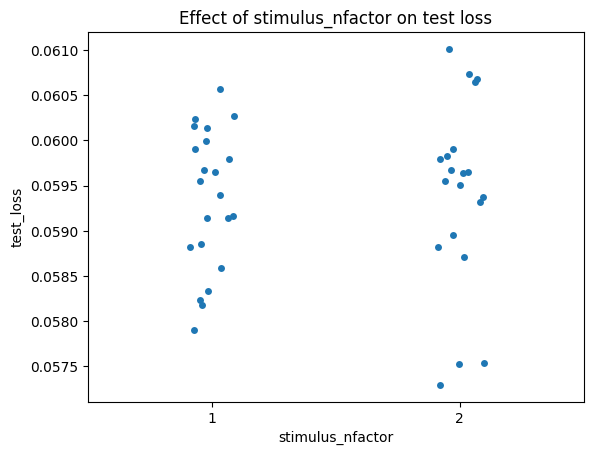

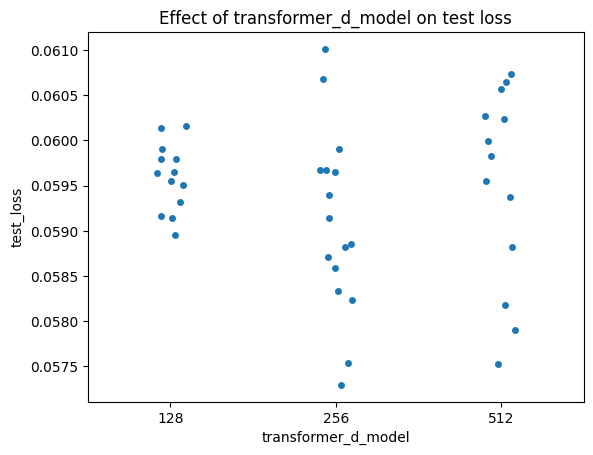

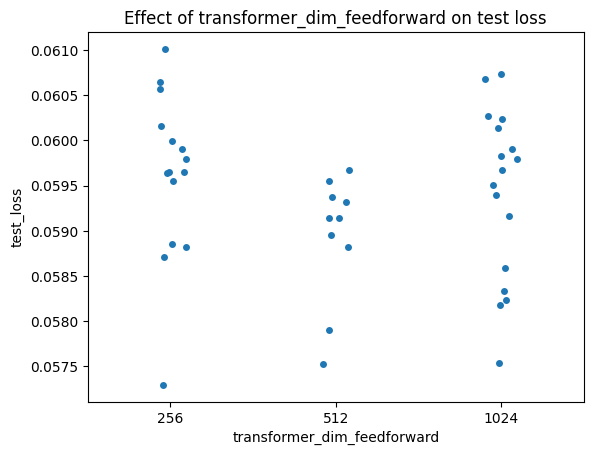

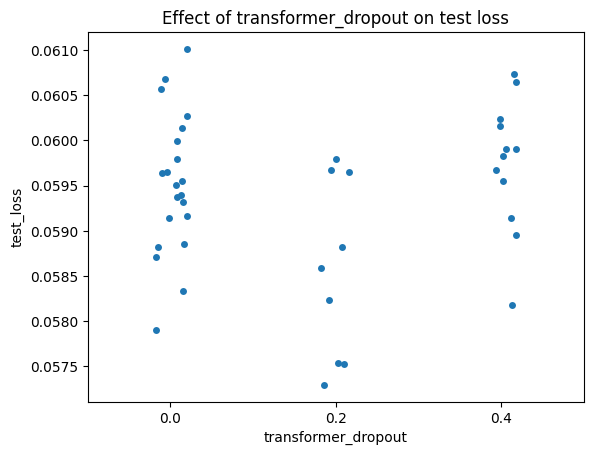

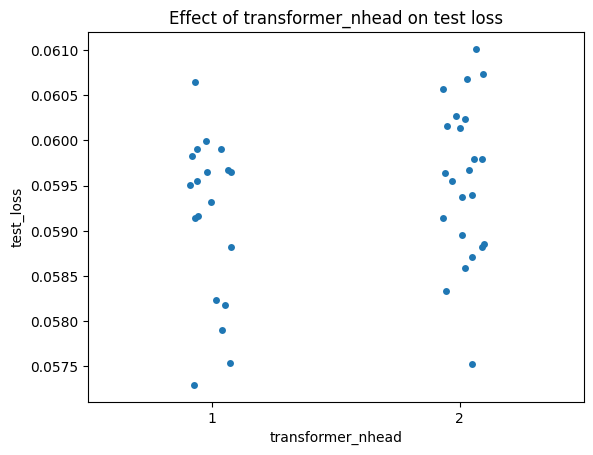

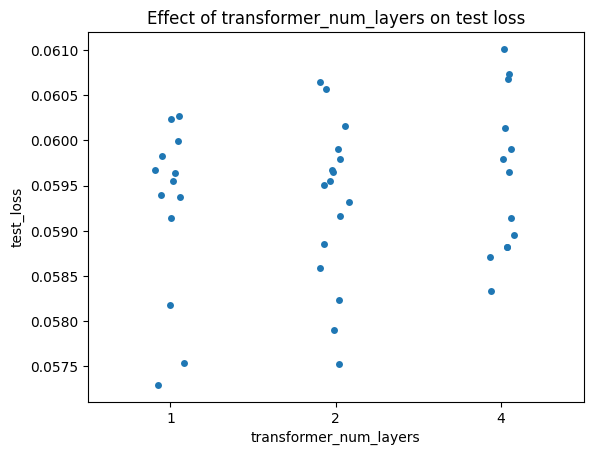

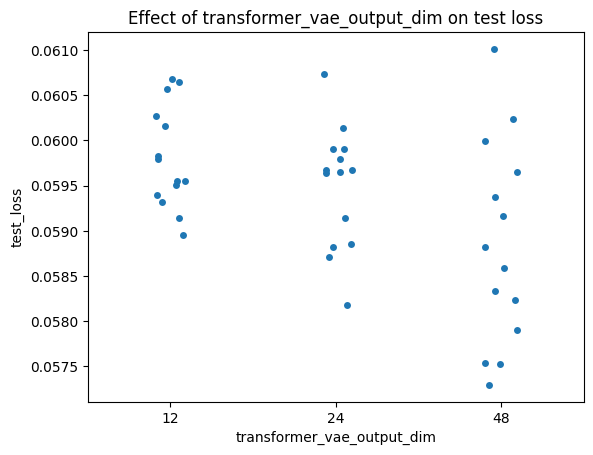

In [21]:
import pandas as pd
from scipy.stats import spearmanr

# Convert to DataFrame
df = pd.DataFrame([{
    **entry["params"],
    "test_loss": entry["best_test_loss"]
} for entry in json_objects_filtered])

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    if col == "test_loss" or df[col].nunique() <= 1:
        continue
    plt.figure()
    sns.stripplot(x=col, y="test_loss", data=df, jitter=True, size=5)
    plt.title(f"Effect of {col} on test loss")
    plt.show()
